<img align="right" style="max-width: 200px; height: auto" src="fs_logo.jpg">

## Lab 02 - Daten Akquise, Aufbereitung und Validierung

Seminar Forensische Datenanalysen, Frankfurt School, 2021

Die Analysen des Seminars **Forensische Datenanalysen** basieren auf Jupyter Notebook (https://jupyter.org). Anhand solcher Notebooks ist es möglich eine Vielzahl von Datenanalysen und statistischen Validierungen durchzuführen. 

<img align="center" style="max-width: 700px" src="lab_banner.png">

Im letzten Lab haben wir einige der grundlegenden Funktionen von Jupyter Notebook kennengelernt. In diesem Praktikum werden wir Jupyter Notebook verwenden, um ausgewählte **Schritte des im Rahmen des Seminars vorgestellten Datenanalyseprozesses** praktisch zu vertiefen. Das Hauptziel dieses Notebook ist es, die einzelne Schritte des Datenimports und der Datenvalidierung anhand eines konkreten Beispiels durchzuführen.

<img align="center" style="max-width: 800px; height: auto" src="analytics_process.png">

Im Zweifelsfall oder bei Fragen wenden Sie sich, wie immer gerne an uns via **marco (dot) schreyer (at) unisg (dot) ch**. Wir wünschen Ihnen Viel Freude mit unseren Notebooks und Ihren Forensischen Analysen!

## Lernziele des Labs:

Nach der heutigen Übung sollten Sie in der Lage sein:

> 1. Erste eigene Datenakquisen mit **Jupyter** und **Python** durchzuführen.
> 2. Die Bibliotheken **Pandas** und **NumPy** zu verwenden, um eine Vielzahl von strukturierten Daten zu validieren. 
> 3. Die Bibliotheken **Matplotlib** und **Seaborn** zu verwenden, um eigene Datenvisualisierungen zu erstellen.
> 4. Erste **konkrete Ideen** für mögliche Datenanalysen in Ihrem Unternehmen zu entwickeln.

Doch bevor wir beginnen, sehen wir uns ein kurzes Motivationsvideo an, welches im Jahr 2019 durch das **American Institute of Certified Public Accountants (AICPA)** über die Anwendung von Jupyter Notebooks und die Programmiersprache Python veröffentlicht wurde: 

In [1]:
from IPython.display import YouTubeVideo
# AICPA: Upgrade the Financial Statement Audit with Audit Data Analytics
# YouTubeVideo('kHY-Ioq_InA', width=800, height=600)

## 1. Einrichtung der Jupyter Notebook-Umgebung

In Analogie zu unserem einführenden Notebook ist es zunächst wieder notwendig, einige Python-Bibliotheken zu importieren, die es uns ermöglichen, Daten zu importieren, zu analysieren und zu visualisieren. In diesem Notebook werden wir hierzu wieder die in **Lab 01** vorgestellten Bibliotheken **(1) Pandas** (https://pandas.pydata.org), **(2) NumPy** (https://numpy.org) und **(3) Matplotlib** (https://matplotlib.org) verwenden.

Lassen Sie uns nun die beiden wichtigsten Datenanalyse-Bibliotheken `Pandas` und `NumPy` entsprechend importieren, indem wir die nachfolgenden beiden `import` Anweisungen ausführen:

In [2]:
import pandas as pd
import numpy as np

# setzen globaler Pandas Parameter
pd.options.display.max_rows = 500 # allgemeine Darstellung Anzahl Zeilen
pd.options.display.float_format = '{:.2f}'.format # numerische Darstellung von Gleitkommazahlen

Außerdem importieren wir einige **Utility Bibliotheken**, d.h. Bibliotheken die wichtige zusätzliche Funktionalitäten zur Verfügung stellen:

In [3]:
import os # ermöglicht die Erstellung, den Zugriff und die Manipulation von Datenverzeichnissen
import datetime as dt # ermöglicht die Erstellung von Zeitstempeln für Daten

Auch importieren wir eine Reihe von **zusätzlichen Bibliotheken** für den Datenzugriff und den Datenimport in Python:

In [4]:
import io # ermöglicht das Öffnen und den Zugriff auf Datenströme
import pathlib # ermöglicht das Schreiben von lokaken Dateien
import urllib # ermöglicht die Erstellung von Webseiten Anfragen

Schliesslich importieren wir die Bibliotheken `Matplotlib` und `Seaborn` und setzen einige der allgemeinen Parameter für die Datenvisualisierung:

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# setzen globaler Matplotlib Paramater der Datenvisualisierung
plt.style.use('seaborn') # den Visualisierungsstil festlegen
plt.rcParams['figure.figsize'] = [5, 5] # die Visualisierungsgrösse festlegen
plt.rcParams['figure.dpi']= 150 # die Visualisierungsauflösung festlegen

Die nachfolgende Anweisung aktiviert das sog. **Inline-Plotten** von Schaubildern innerhalb des aktuellen Notebooks:

In [6]:
%matplotlib inline

Darüber hinaus ist es gute Praxis, für jedes Notebook eine entsprechende Ordnerstruktur anzulegen. Diese Ordnerstruktur dient im weiteren Analyseverlauf dazu sowohl die **Originaldaten** als auch **Analyseergebnisse** und **Schaubilder** zu speichern:

In [7]:
# erstellen des Verzeichnis der Orignaldaten
original_data_dir = './01_original_data'
if not os.path.exists(original_data_dir): os.makedirs(original_data_dir) 
    
# erstellen des Verzeichnis der Analysedaten
analysis_data_dir = './02_analysis_data'
if not os.path.exists(analysis_data_dir): os.makedirs(analysis_data_dir)
    
# erstellen des Verzeichnis der Validierungsergebnisse
validation_data_dir = './03_validation_results'
if not os.path.exists(validation_data_dir): os.makedirs(validation_data_dir) 

Abschliessend möchten wir mögliche **Warnungen** einzelner Bibliotheken unterdrücken:

In [8]:
import warnings # ermöglicht die Handhabung von Warnmeldungen

# setzen des Warnfilter-Flags, um Warnungen zu ignorieren
warnings.filterwarnings('ignore')

Solche Warnungen können oftmals aufgrund von aktuellen Bibliothekserweiterungen bzw. -weiterentwicklungen erscheinen. Diese sollen uns jedoch im weiteren Analyseverlauf nicht stören, weshalb wir sie im Rahmen dieses Notebooks ignorieren.

## 2. Datensatz Download und Import

Die Abbildung unten zeigt die hierarchische Ansicht eines **Enterprise Resource Planning (ERP) Systems**, wie beispielsweise SAP-ERP, das buchhalterische Vorgänge in Form von Journaleinträgen in Datenbanktabellen aufzeichnet. Im Kontext forensischer Datenanalysen können die in solchen Systemen erfassten bzw. gesammelten Daten wertvolle Hinweise auf mögliche Betrugsversuche enthalten.

Der synthetische **Forensic Accounting** Datensatz stellt einen Datenextrakt aus SAP Finance, einem der am meisten verbreitetsten ERP-Systeme, dar. Konkret umfasst der Datensatz die beiden grundlegenden Tabellen eines **SAP Finance (FI) Moduls**. Das SAP FI Modul umfasst sämtliche Geschäftsprozesse im Bereich des Finanz- und Rechnungswesens.

Dazu gehören unter anderem die **Debitoren- und Kreditorenbuchhaltung** sowie die **Haupt- und Nebenbuchhaltung**. Die über das Modul SAP FI abgebildeten Prozesse dienen somit der doppelten Buchführung, Erfassung von Belegen auf den erforderlichen Konten und der damit einhergehenden Gewinnermittlung für externe (Finanzamt) und interne Zwecke (Geschäftsführung).

<img align="center" style="max-width: 700px" src="sap_system.png">

Insgesamt umfasst der Forensic Accounting Datensatz **3.313 Belegeköpfe (Tabelle BKPF)** und **2.811 Belegsegmente (Tabelle BSEG)** des Geschäftsjahres 2016 eines anonymisierten Unternehmens. Die **Tabelle BKPF** enthält die allgemeinen Beleginformationen, z.B. die nachfolgenden Tabellenfelder:

>- `MANDT`: Client
>- `BUKRS`: Company Code
>- `BELNR`: Accounting Document Number
>- `GJAHR`: Fiscal Year
>- `BLART`: Document Type
>- `USNAM`: User Name
>- `TCODE`: Transaction Code
>- `BLDAT`: Document Date in Document
>- `CPUDT`: Posting Date Recorded
>- `BUDAT`: Posting Date in Document
>- ...

Weitere Informationen zu den BKPF Tabellenfeldern: https://www.leanx.eu/en/sap/table/bkpf.html. 

Die **Tabelle BSEG** enthält die detaillierten Beleginformationen auf Ebene der gebuchten Haupt- und Nebenbuchkonten, z.B. die nachfolgenden Tabellenfelder:

>- `MANDT`: Client
>- `BUKRS`: Company Code
>- `BELNR`: Accounting Document Number
>- `GJAHR`: Fiscal Year
>- `BUZEI`: Posting Line Item
>- `BSCHL`: Posting Key
>- `DMBTR`: Amount in Local Currency
>- `SHKZG`: Debit/Credit Indicator
>- `HKONT`: General Ledger Account
>- `SGTXT`: Item Text
>- `KUNNR`: Customer Identifier
>- `LIFNR`: Vendor Identifier
>- ...

Weitere Informationen zu den BSEG Tabellenfeldern: https://www.leanx.eu/en/sap/table/bseg.html. 

Die aktuelle Version des Datensatzes wurde am 20. April 2018 durch Michael Schermann an der Technischen Universität München als Teil des damaligen **'White-Collar Hacking Contests** veröffentlicht. Weitere Einzelheiten zu diesem Datensatz sind in der nachfolgenden Veröffentlichung finden: *Schermann, Michael, and Scott R. Boss. "The White-Collar Hacking Contest: A Novel Approach to Teach Forensic Investigations in a Digital World." (2014).* Der Datensatz selbst kann über die nachfolgende **GitHub-Webseite** bezogen werden: https://github.com/mschermann/forensic_accounting.

### 2.1. Download des Forensic Accounting Datensatzes

Lassen Sie uns nun die beiden grundlegenden Tabellen der **Belegköpfe (BKPF)** und **Belegsegmente (BSEG)** des Forensic Accounting Datensatzes herunterladen und lokal speichern. Hierzu ist es zunächst notwendig, den Pfad bzw. die Internetadressen der zu importierenden Tabellen zu definieren:

In [9]:
bkpf_table_url = 'https://raw.githubusercontent.com/mschermann/forensic_accounting/master/BKPF.csv'
bseg_table_url = 'https://raw.githubusercontent.com/mschermann/forensic_accounting/master/BSEG.csv'

Im Sinne guter forensischer Praxis und den damit verbundenen Dokumentationszwecken erzeugen wir auch einen **Zeitstempel des Datendownloads**. Die Erstellung des Zeitstempels erfolgt über die `utcnow` Anweisung ([Dokumentation](https://docs.python.org/3/library/datetime.html)) der `datetime` Bibliothek und Formatangabe des Zeitstempels:

In [10]:
timestamp = dt.datetime.utcnow().strftime('%Y-%m-%d_%H-%M-%S')

In einem nächsten Schritt öffnen wir eine Verbindung zu beiden zuvor definierten Internetadressen. Hierzu verwenden wir die Anweisung `request.urlopen` der bereits importierten `URLLib` Bibliothek:

In [11]:
bkpf_request = urllib.request.urlopen(bkpf_table_url) # erstellen einer Verbindung zur BKPF URL
bseg_request = urllib.request.urlopen(bseg_table_url) # erstellen einer Verbindung zu BSEG URL

Im Anschluss werden die Daten beider Tabellen **unverändert** d.h. im sogenannten **Byte-Format** heruntergeladen:

In [12]:
bkpf_data_raw = io.BytesIO(bkpf_request.read()) # einlesen der BKPF Daten
bseg_data_raw = io.BytesIO(bseg_request.read()) # einlesen der BSEG Daten

Abschliessend speichern wir eine Arbeitskopie beider Tabellen auf dem lokalen Dateisystem im CSV-Format. Das Speichern erfolgt innerhalb des bereits zuvor erstellten Ordners für zu archivierende **erhaltene Originaldaten** mit der Bezeichnung ***01_original_data***. Hierzu verwenden wir die Anweisung `write_bytes` der importierten `Pathlib` Bibliothek.

In [13]:
# definition des Dateinamens der BKPF Originaldaten
bkpf_original_file_name = timestamp + '_bkpf_file_original.csv'

# definition Dateipfades der BKPF Originaldaten
bkpf_path_original = os.path.join(original_data_dir, bkpf_original_file_name)

# speichern der BKPF Originaldaten
pathlib.Path(bkpf_path_original).write_bytes(bkpf_data_raw.getbuffer())

# definition des Dateinamens der BSEG Originaldaten
bseg_original_file_name = timestamp + '_bseg_file_original.csv'

# definition Dateipfades der BSEG Originaldaten
bseg_path_original = os.path.join(original_data_dir, bseg_original_file_name)

# speicher der BSEG Originaldaten
pathlib.Path(bseg_path_original).write_bytes(bseg_data_raw.getbuffer());

Nachfolgend speichern wir die unveränderten Daten beider Tabellen erneut auf dem lokalen Dateisystem im CSV-Format. Der zweite Speichervorgang erfolgt innerhalb des bereits zuvor erstellten Ordners für zu **analysierende Originaldaten** mit dem Namen ***02_analysis_data*** ab:

In [14]:
# definition des Dateinamens der BKPF Analysedaten
bkpf_analysis_file_name = timestamp + '_bkpf_file_analysis.csv'

# definition Dateipfades der BKPF Originaldaten
bkpf_path_analysis = os.path.join(analysis_data_dir, bkpf_analysis_file_name)

# speichern der BKPF Originaldaten
pathlib.Path(bkpf_path_analysis).write_bytes(bkpf_data_raw.getbuffer())

# definition des Dateinamens der BSEG Originaldaten
bseg_analysis_file_name = timestamp + '_bseg_file_analysis.csv'

# definition Dateipfades der BSEG Originaldaten
bseg_path_analysis = os.path.join(analysis_data_dir, bseg_analysis_file_name)

# speicher der BSEG Originaldaten
pathlib.Path(bseg_path_analysis).write_bytes(bseg_data_raw.getbuffer());

### 2.2. Import des Forensic Accounting Datensatzes

In einem nächsten Schritt möchten wir beide Tabellen jeweils als `Pandas` DataFrame in das Notebook importieren. Hierzu ist es notwendig, die beiden im CSV-Format vorliegenden Dateien über die `read_csv` Anweisung ([Dokumentation](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)) der `Pandas` Bibliothek einzulesen:

In [15]:
bkpf_data = pd.read_csv(bkpf_path_analysis, sep=',', index_col=0, thousands=',') # einlesen der BKPF Tabelle 
bseg_data = pd.read_csv(bseg_path_analysis, sep=',', index_col=0, thousands=',') # einlesen der BSEG Tabelle 

Lassen Sie uns nun die **5 ersten Zeilen** der Tabelle **Belegköpfe (BKPF)** anschauen um zu überprüfen, dass die Daten grundsätzlich im richtigen Format d.h. als `Pandas` DataFrame importiert wurden. Hierzu verwenden wir die `head` Anweisung ([Dokumentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html)) der `Pandas` Bibliothek:

In [16]:
bkpf_data.head(5)

,MANDT,BUKRS,BELNR,GJAHR,BLART,BLDAT,BUDAT,MONAT,CPUDT,CPUTM,...,SSBLK,BATCH,SNAME,SAMPLED,EXCLUDE_FLAG,BLIND,OFFSET_STATUS,OFFSET_REFER_DAT,PENRC,KNUMV
0,375,US00,90000000,2016,RV,5/27/16,5/27/16,5,5/27/16,1:50:33 PM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,375,US00,90000001,2016,RV,5/27/16,5/27/16,5,5/27/16,1:50:42 PM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,375,US00,90000002,2016,RV,5/27/16,5/27/16,5,5/27/16,1:50:44 PM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,375,US00,1400000000,2016,DZ,5/27/16,5/27/16,5,5/27/16,1:53:58 PM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,375,US00,1400000001,2016,DZ,5/27/16,5/27/16,5,5/27/16,1:53:58 PM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Über die `tail` Anweisung ([Dokumentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.tail.html)) der `Pandas` Bibliothek ist es zudem z.B. möglich auch die **5 letzten Zeilen** der Tabelle **Belegköpfe (BKPF)** auszugeben. Auch hier lohnt es sich wieder zu überprüfen, dass die Daten grundsätzlich im richtigen Format d.h. als DataFrame importiert wurden. Drüber hinaus kann geprüft werden, ob im Rahmen des Imports sog. Versatzfehler aufgetreten sind:

In [17]:
bkpf_data.tail(5)

,MANDT,BUKRS,BELNR,GJAHR,BLART,BLDAT,BUDAT,MONAT,CPUDT,CPUTM,...,SSBLK,BATCH,SNAME,SAMPLED,EXCLUDE_FLAG,BLIND,OFFSET_STATUS,OFFSET_REFER_DAT,PENRC,KNUMV
3308,375,US00,1500000350,2017,KZ,2/23/17,2/23/17,2,2/23/17,2:43:24 PM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3309,375,US00,1500000351,2017,KZ,2/23/17,2/23/17,2,2/23/17,2:43:24 PM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3310,375,US00,1500000352,2017,KZ,2/23/17,2/23/17,2,2/23/17,2:43:24 PM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3311,375,US00,1500000353,2017,KZ,2/23/17,2/23/17,2,2/23/17,2:43:24 PM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3312,375,US00,1500000354,2017,KZ,2/23/17,2/23/17,2,2/23/17,2:43:24 PM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Strukturelle Datenvalidierung

Im Rahmen der **strukturellen Datenvalidierung** wird überprüft, ob technische Diskrepanzen zwischen der erwarteten Datenpopulation und der tatsächlich erhalten Datenpopulation existieren, z.B. bedingt durch fehlende Datensätze oder Formatierungsfehler. Das Hauptziel der strukturellen Datenvalidierung besteht darin, die technische Vollständigkeit und Integrität der erhaltenen Daten sicherzustellen.

Nachfolgend möchten wir grundlegende Schritte der strukturellen Datanvalidierung durchführen, diese umfassen: die Validierung der Anzahl Belegzeilen (**Abschnitt 3.1**) und die Validierung der Merkmalsdatentypen (**Abschnitt 3.2**).

### 3.1. Validierung der Belegzeilen

Nachfolgend soll nun vereinfacht eine strukturelle Validierung der Belegköpfe und Belegsegmente durchgeführt werden. In einem ersten Schritt validieren wir die Vollständigkeit der erhaltenen Daten. Hierzu ermitteln wir die Anzahl der Datenzeilen und Datenspalten und gleichen diese Information mit der erwarteten Zeilen- und Spaltenanzahl ab. Der Abgleich erfolgt unter Verwendung der `shape` Anweisung ([Dokumentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html)) der `Pandas`Bibliothek. 

Lassen Sie uns zunächst die Tabelle **Belegköpfe (BKPF)** auswerten:

In [18]:
bkpf_data.shape

(3313, 113)

Lassen Sie uns die Tabelle **Belegsegmente (BSEG)** auswerten:

In [19]:
bseg_data.shape

(2811, 336)

Die eingelesene Tabelle BKPF umfasst insgesamt **3.313 Zeilen** und **113 Spalten**, die Tabelle BSEG umfasst **2.811 Zeilen** und **336 Spalten**. Diese Informationen gilt es nun mit der erhaltenen Dokumentation über die Daten abzugleichen.

### 3.2. Validierung der Datentypen

In einem zweiten Schritt sollen die Datentypen der einzelnen Datenmerkmale validiert werden. Die `Pandas` Bibliothek unterscheidet grds. die nachfolgenden Datentypen:

>- `int64` - bezeichnet numerische Werte natürlicher bzw. ganzer Zahlen.
>- `float64` - bezeichnet numerische Werte reeller bzw. fliesskomma Zahlen.
>- `object` - bezeichnet alphanumerische Werte bzw. Textfelder.

Eine Übersicht und detailierte Beschreibung der verschiedenen Datentypen in `Pandas` findet sich in der nachfolgenden Referenz ([Pandas Datentypen](https://pbpython.com/pandas_dtypes.html)). Die Datentypen der einzelnen Spalten eines `DataFrames` können anhand der `dtypes` Anweisung ([Dokumentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html)) der `Pandas` Bibliothek ermittelt werden.


Lassen Sie uns auch diesmal wieder mit Tabelle **Belegköpfe (BKPF)** beginnen:

In [20]:
bkpf_data.dtypes

MANDT                 int64
BUKRS                object
BELNR                 int64
GJAHR                 int64
BLART                object
BLDAT                object
BUDAT                object
MONAT                 int64
CPUDT                object
CPUTM                object
AEDAT                object
UPDDT               float64
WWERT                object
USNAM                object
TCODE                object
BVORG                object
XBLNR                object
DBBLG               float64
STBLG               float64
STJAH                 int64
BKTXT               float64
WAERS                object
KURSF               float64
KZWRS               float64
KZKRS                 int64
BSTAT               float64
XNETB               float64
FRATH                 int64
XRUEB               float64
GLVOR                object
GRPID               float64
DOKID               float64
ARCID               float64
IBLAR               float64
AWTYP                object
AWKEY               

Lassen Sie uns wieder die Tabelle **Belegsegmente (BSEG)** auswerten:

In [21]:
bseg_data.dtypes

MANDT           int64
BUKRS          object
BELNR         float64
GJAHR           int64
BUZEI           int64
BUZID          object
AUGDT          object
AUGCP          object
AUGBL         float64
BSCHL           int64
KOART          object
UMSKZ         float64
UMSKS         float64
ZUMSK         float64
SHKZG          object
GSBER          object
PARGB          object
MWSKZ          object
QSSKZ         float64
DMBTR         float64
WRBTR         float64
KZBTR           int64
PSWBT         float64
PSWSL          object
TXBHW           int64
TXBFW           int64
MWSTS           int64
WMWST           int64
HWBAS           int64
FWBAS           int64
HWZUZ           int64
FWZUZ           int64
SHZUZ         float64
STEKZ         float64
MWART         float64
TXGRP           int64
KTOSL          object
QSSHB           int64
KURSR         float64
GBETR           int64
BDIFF           int64
BDIF2           int64
VALUT          object
ZUONR         float64
SGTXT          object
ZINKZ     

Auch die gewonnenen Informationen zu den verschiedenen Datentypen gilt es wieder mit der erhaltenen Datendokumentation abzugleichen. 

Beispielsweise wird auf Grundlage der Validierung deutlich, dass der Datentyp des Feldes Belegnummer (Tabellenfeld: BELNR) in beiden Tabellen einen **unterschiedlichen Datentyp** aufweist. In der Tabelle BKPF den Typ `int64` (natürliche Zahlen) und in der Tabelle BSEG den Typ `float64` (reelle Zahlen). Um diese Dateninkonsistenz zu beseitigen wandeln wir den Datentyp des Tabellenfelds BELNR in der Tabelle BSEG in `int64` (reelle Zahlen) um. Die Umwandlung erfolgt unter Verwendung der `astype` Anweisung ([Dokumentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html)) der `Pandas` Bibliothek:

In [22]:
bseg_data['BELNR'] = bseg_data['BELNR'].astype(np.int64)

Lassen Sie uns nun erneut die Datentypen der Tabelle **Belegsegmente (BSEG)** auswerten:

In [23]:
bseg_data.dtypes

MANDT           int64
BUKRS          object
BELNR           int64
GJAHR           int64
BUZEI           int64
BUZID          object
AUGDT          object
AUGCP          object
AUGBL         float64
BSCHL           int64
KOART          object
UMSKZ         float64
UMSKS         float64
ZUMSK         float64
SHKZG          object
GSBER          object
PARGB          object
MWSKZ          object
QSSKZ         float64
DMBTR         float64
WRBTR         float64
KZBTR           int64
PSWBT         float64
PSWSL          object
TXBHW           int64
TXBFW           int64
MWSTS           int64
WMWST           int64
HWBAS           int64
FWBAS           int64
HWZUZ           int64
FWZUZ           int64
SHZUZ         float64
STEKZ         float64
MWART         float64
TXGRP           int64
KTOSL          object
QSSHB           int64
KURSR         float64
GBETR           int64
BDIFF           int64
BDIF2           int64
VALUT          object
ZUONR         float64
SGTXT          object
ZINKZ     

## 4. Datensatz Aufbereitung

Der Schritt der **Datenaufbereitung** stellt einen elementaren Bestandteil im Rahmen der Durchführung forensischer Datenanalysen dar. Unter Datenaufbereitung wird die **Bereinigung und Transformation von Rohdaten vor der Verarbeitung und Auswertung verstanden**. Dies ermöglicht eine effiziente Analyse und kann die Anzahl möglicher Fehler und Ungenauigkeiten während der Analysen reduzieren. 

Nachfolgend möchten wir grundlegende Schritte der forensischen Datenaufbereitung durchführen, diese umfassen: die Erstellung eines Identifikationsmerkmals (**Abschnitt 4.1**), die Auswahl analyserelevanter Datenmerkmale (**Abschnitt 4.2**), die Aufbereitung ausgewählter Datenmerkmale (**Abschnitt 4.3**) sowie die Verknüpfung verschiedener Datenmerkmale (**Abschnitt 4.4**).

### 4.1. Erstellung eines Identifikationsmerkmals

Ein eindeutiges **Identifikationsmerkmal** wird innerhalb der forensischen Datenanalyse zur eindeutigen Kennzeichnung einzelner Datensätze verwendet. Diese Kennzeichnung ist notwendig, um einzelne Datensätze im weiteren Analysevorgehen eindeutig identifizieren zu können. Eine solches Identifikationsmerkmal besteht häufig aus einer **verketteten Folge von vorhandenen Datenmerkmalen**. Die Datenmerkmale werden so ausgewählt werden, dass die Verkettung für jede Zeile des Datensatzes ein eindeutiges Identifizierungsmerkmal darstellt.

Im Kontext von SAP-Buchhaltungsbelegen hat sich die Verkettung der nachfolgenden Merkmale zur Erstellung eindeutiger Identifikationsmerkmale bewährt. Für die SAP-Tabelle der Belegköpfe (BKPF) wird das Identifikationsmerkmal oftmals anhand der vier Merkmale **Mandant (MANDT)**, **Buchungskreis (BUKRS)**, **Geschäftsjahr (GJAHR)** und **Belegnummer (BELNR)** erstellt. Nachfolgend erzeugen wir nun ein solches Identifikationsmerkmal in einer neuen Spalte der Tabelle BKPF mit der Bezeichnung **KEY** durch die Verkettung der Merkmale:

In [24]:
bkpf_data['KEY'] = bkpf_data['MANDT'].astype(str) + '_' + bkpf_data['BUKRS'].astype(str) + '_' + bkpf_data['GJAHR'].astype(str) + '_' + bkpf_data['BELNR'].astype(str)

Lassen Sie uns nun die korrekte Anlage des Identifikationsmerkmals anhand der **5 ersten Zeilen** der Tabelle **Belegköpfe (BKPF)** überprüfen:

In [25]:
bkpf_data.head(5)

,MANDT,BUKRS,BELNR,GJAHR,BLART,BLDAT,BUDAT,MONAT,CPUDT,CPUTM,...,BATCH,SNAME,SAMPLED,EXCLUDE_FLAG,BLIND,OFFSET_STATUS,OFFSET_REFER_DAT,PENRC,KNUMV,KEY
0,375,US00,90000000,2016,RV,5/27/16,5/27/16,5,5/27/16,1:50:33 PM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,375_US00_2016_90000000
1,375,US00,90000001,2016,RV,5/27/16,5/27/16,5,5/27/16,1:50:42 PM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,375_US00_2016_90000001
2,375,US00,90000002,2016,RV,5/27/16,5/27/16,5,5/27/16,1:50:44 PM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,375_US00_2016_90000002
3,375,US00,1400000000,2016,DZ,5/27/16,5/27/16,5,5/27/16,1:53:58 PM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,375_US00_2016_1400000000
4,375,US00,1400000001,2016,DZ,5/27/16,5/27/16,5,5/27/16,1:53:58 PM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,375_US00_2016_1400000001


Für die SAP-Tabelle der Belegsegmente (BSEG) wird das Identifikationsmerkmal auch anhand der vier Merkmale **Mandant (MANDT)**, **Buchungskreis (BUKRS)**, **Geschäftsjahr (GJAHR)** und **Belegnummer (BELNR)** erstellt. Nachfolgend erzeugen wir wieder nun ein solches Identifikationsmerkmal in einer neuen Spalte innerhalb der Tabelle BSEG mit der Bezeichnung **KEY** durch die Verkettung der Merkmale:

In [26]:
bseg_data['KEY'] = bseg_data['MANDT'].astype(str) + '_' + bseg_data['BUKRS'].astype(str) + '_' + bseg_data['GJAHR'].astype(str) + '_' + bseg_data['BELNR'].astype(str)

Lassen Sie uns nun auch wieder die korrekte Anlage des Identifikationsmerkmals anhand der **5 ersten Zeilen** der Tabelle **Belegsegmente (BSEG)** überprüfen:

In [27]:
bseg_data.head(5)

,MANDT,BUKRS,BELNR,GJAHR,BUZEI,BUZID,AUGDT,AUGCP,AUGBL,BSCHL,...,FASTPAY,IGNR_IVREF,FMFGUS_KEY,FMXDOCNR,FMXYEAR,FMXDOCLN,FMXZEKKN,PRODPER,RECRF,KEY
0,375,US00,1500000001,2017,1,NaN,NaN,NaN,NaN,50,...,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,375_US00_2017_1500000001
1,375,US00,1500000001,2017,2,NaN,1/24/17,1/24/17,1500000001.00,25,...,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,375_US00_2017_1500000001
2,375,US00,1500000002,2017,1,NaN,NaN,NaN,NaN,50,...,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,375_US00_2017_1500000002
3,375,US00,1500000002,2017,2,NaN,1/24/17,1/24/17,1500000002.00,25,...,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,375_US00_2017_1500000002
4,375,US00,1500000003,2017,1,NaN,NaN,NaN,NaN,50,...,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,375_US00_2017_1500000003


Da wir nun in beiden Tabellen jeder Datenzeile ein eindeutiges Identifikationsmerkmal zugewiesen haben, können wir in einem nächsten Schritt mit der strukturellen Validierung der Buchungsdaten fortfahren.

### 4.2. Auswahl von Datenmerkmalen

Im Rahmen einer forensischen Datenanalyse ist es gängige Praxis, die Datenmerkmale (Tabellenfelder) der zu analysierenden Daten auf die für eine Analyse notwendigen Merkmale zu reduzieren. Die Reduktion geschieht oftmals z.B. aus Gründen des Datenschutzes und der damit geforderten Datensparsamkeit jedoch oftmals aus Gründen der Analyseeffizienz. 

Lassen Sie uns hierzu zunächst die Datenmerkmale der beiden Tabellen Belegköpfe (BKPF) und Belegsegmente (BSEG) festlegen, welche für die nachfolgenden Analysen notwendig sind. Die **relevanten Datenmerkmale** werden nachfolgend für in Form einer Python `Liste` definiert:

In [28]:
bkpf_fields = ['KEY', 'MANDT', 'BUKRS', 'BELNR', 'GJAHR', 'BLART', 'USNAM', 'TCODE', 'BLDAT', 'CPUDT', 'BUDAT', 'BKTXT', 'WAERS']
bseg_fields = ['KEY', 'MANDT', 'BUKRS', 'BELNR', 'GJAHR', 'BUZEI', 'BSCHL', 'DMBTR', 'WRBTR', 'SHKZG', 'HKONT', 'SGTXT', 'KUNNR', 'LIFNR']

In einem nächsten Schritt werden die Tabellen um die nicht benötigten Datenmerkmale bereinigt: 

In [29]:
bkpf_data_sel = bkpf_data[bkpf_fields]
bseg_data_sel = bseg_data[bseg_fields]

Lassen Sie uns nun das Filterergebnis anhand der **5 ersten Zeilen** der Tabelle **Belegköpfe (BKPF)** überprüfen:

In [30]:
bkpf_data_sel.head(5)

,KEY,MANDT,BUKRS,BELNR,GJAHR,BLART,USNAM,TCODE,BLDAT,CPUDT,BUDAT,BKTXT,WAERS
0,375_US00_2016_90000000,375,US00,90000000,2016,RV,GBI-005,VF01,5/27/16,5/27/16,5/27/16,NaN,USD
1,375_US00_2016_90000001,375,US00,90000001,2016,RV,GBI-005,VF01,5/27/16,5/27/16,5/27/16,NaN,USD
2,375_US00_2016_90000002,375,US00,90000002,2016,RV,GBI-005,VF01,5/27/16,5/27/16,5/27/16,NaN,USD
3,375_US00_2016_1400000000,375,US00,1400000000,2016,DZ,GBI-005,FBZ1,5/27/16,5/27/16,5/27/16,NaN,USD
4,375_US00_2016_1400000001,375,US00,1400000001,2016,DZ,GBI-005,FBZ1,5/27/16,5/27/16,5/27/16,NaN,USD


Lassen Sie uns das Filterergebnis auch anhand der **5 ersten Zeilen** der Tabelle **Belegsegmente (BSEG)** überprüfen:

In [31]:
bseg_data_sel.head(5)

,KEY,MANDT,BUKRS,BELNR,GJAHR,BUZEI,BSCHL,DMBTR,WRBTR,SHKZG,HKONT,SGTXT,KUNNR,LIFNR
0,375_US00_2017_1500000001,375,US00,1500000001,2017,1,50,213710.00,213710.00,H,100000,NaN,NaN,NaN
1,375_US00_2017_1500000001,375,US00,1500000001,2017,2,25,213710.00,213710.00,S,300000,NaN,NaN,125131.00
2,375_US00_2017_1500000002,375,US00,1500000002,2017,1,50,1068550.00,1068550.00,H,100000,NaN,NaN,NaN
3,375_US00_2017_1500000002,375,US00,1500000002,2017,2,25,1068550.00,1068550.00,S,300000,NaN,NaN,125131.00
4,375_US00_2017_1500000003,375,US00,1500000003,2017,1,50,933153.41,933153.41,H,100000,NaN,NaN,NaN


### 4.3. Aufbereitung von Datenmerkmalen

Ob es sich bei einer Buchungszeile um eine Soll- oder Habenzeile handelt, wird in SAP FI anhand **des sog. Soll- und Haben-Kennzeichens der Belegsegmente festgelegt** (Tabelle BSEG, Tabellenfeld: SHKZG). Die Ausprägung 'S' des Soll- und Haben-Kennzeichens bezeichnet eine Soll-Position und die Ausprägung 'H' eine Haben-Position. Eine Aufbereitung der Betragsfelder um diese Information ist für nachfolgende Validierungs- bzw. Analyseschritten oftmals hilfreich, um aussagekräftiger Ergebnisse zu erzielen. 

Um eine solche Aufbereitung vorzunehmen, erstellen wir zunächst eine Kopie der beiden Betragsmerkmale:

In [32]:
# kopieren der Betragsfelder DMBTR und WRBTR
bseg_data_sel['DMBTR_VZ'] = bseg_data_sel['DMBTR']
bseg_data_sel['WRBTR_VZ'] = bseg_data_sel['WRBTR']

In einem nächsten Schritt werden die kopierten Betragsmerkmale mit einem entsprechenden Vorzeichen versehen. Hierbei ist es eine übliche Konvention, dass Sollzeilen ein **positives Vorzeichen** und Habenzeilen ein **negatives Vorzeichen** aufweisen. Die Anreicherung beider Betragsmerkmale erfolgt durch die Verwendung der `iloc` Anweisung ([Dokumentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html)) der `Pandas` Bibliothek:

In [33]:
# anreichern des Betragsfeldes DMBTR_VZ mit Vorzeichen
bseg_data_sel.loc[bseg_data_sel['SHKZG'] == 'S', 'DMBTR_VZ'] *= 1.0
bseg_data_sel.loc[bseg_data_sel['SHKZG'] == 'H', 'DMBTR_VZ'] *= -1.0

# anreichern des Betragsfeldes WRBTR_VZ mit Vorzeichen
bseg_data_sel.loc[bseg_data_sel['SHKZG'] == 'S', 'WRBTR_VZ'] *= 1.0
bseg_data_sel.loc[bseg_data_sel['SHKZG'] == 'H', 'WRBTR_VZ'] *= -1.0

### 4.4. Verknüpfung von Datenmerkmalen

In einem letzten Schritt der Datenaufbereitung führen wir unterschiedliche Datenquellen in einer **gemeinsamen Datengrundlage zusammen**. Für die verschiedenen Zielsetzungen nachfolgender Analysen sollen die Belegkopfdaten und Belegsegmentdaten miteinander verknüpft werden. Das nachfolgende Schaubild zeigt beispielhaft die Beziehung beider Datengrundgesamtheiten über die vier Schlüsselmerkmale **Mandant (MANDT)**, **Buchungskreis (BUKRS)**, **Geschäftsjahr (GJAHR)** und **Belegnummer (BELNR)**.

<img align="center" style="max-width: 700px" src="document_linkage.png">

Das Erstellen einer solchen Verknüpfung ermöglicht die Analyse relationaler Beziehungen zwischen Belegköpfen und Belegsegmenten. Die Verknüpfung beider Beleginformationen erfolgt durch die Verwendung der `merge` Anweisung ([Dokumentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html)) der `Pandas` Bibliothek:

In [1]:
bkpf_bseg_sel_merged = bkpf_data_sel.merge(bseg_data_sel, on='KEY', how='inner', suffixes=('_bkpf', '_bseg'))

NameError: name 'bkpf_data_sel' is not defined

Lassen Sie uns nun das Ergebnis der Verknüpfung beider Tabellen anhand der **10 ersten Zeilen** der Verknüpfungstabelle überprüfen:

In [35]:
bkpf_bseg_sel_merged.head(5)

,KEY,MANDT_x,BUKRS_x,BELNR_x,GJAHR_x,BLART,USNAM,TCODE,BLDAT,CPUDT,...,BSCHL,DMBTR,WRBTR,SHKZG,HKONT,SGTXT,KUNNR,LIFNR,DMBTR_VZ,WRBTR_VZ
0,375_US00_2017_1500000001,375,US00,1500000001,2017,KZ,GBI-005,FBZ2,1/24/17,1/24/17,...,50,213710.00,213710.00,H,100000,NaN,NaN,NaN,-213710.00,-213710.00
1,375_US00_2017_1500000001,375,US00,1500000001,2017,KZ,GBI-005,FBZ2,1/24/17,1/24/17,...,25,213710.00,213710.00,S,300000,NaN,NaN,125131.00,213710.00,213710.00
2,375_US00_2017_1500000002,375,US00,1500000002,2017,KZ,GBI-005,FBZ2,1/24/17,1/24/17,...,50,1068550.00,1068550.00,H,100000,NaN,NaN,NaN,-1068550.00,-1068550.00
3,375_US00_2017_1500000002,375,US00,1500000002,2017,KZ,GBI-005,FBZ2,1/24/17,1/24/17,...,25,1068550.00,1068550.00,S,300000,NaN,NaN,125131.00,1068550.00,1068550.00
4,375_US00_2017_1500000003,375,US00,1500000003,2017,KZ,GBI-005,FBZ2,1/24/17,1/24/17,...,50,933153.41,933153.41,H,100000,NaN,NaN,NaN,-933153.41,-933153.41


Über die Anzahl der Einträge innerhalb der Verknüpfungstabelle erhalten wir eine Auskunft darüber, wie viele Verknüpfungen zwischen beiden Tabellen erstellt werden konnten. Lassen Sie uns deshalb die Anzahl der Zeilen innerhalb der Verknüpfungstabelle prüfen:

In [36]:
bkpf_bseg_sel_merged.shape

(2810, 28)

Die Anzahl von 2.810 gefundenen Verknüpfungen veranschaulicht, dass **nicht für jeden Belegkopf zumindest ein zugehöriges Belegsegment gefunden wurde**. 

Diese Beobachtung kann im Kontext von SAP FI zunächst einen Hinweis auf eine etwaige Inkonsistenz der Daten darstellen. Jedoch können auch valide Gründe für eine solche Beobachtung existieren, so werden innerhalb von SAP FI durch sog. **Belegklammern** die Ursprungsbeleg und Ausgleichsbeleg zusammenfassen. Solche Belegklammern werden in Form von Belegköpfen innerhalb der Tabelle BKPF erfasst. Die gewonnenen Erkenntnisse gilt es jedoch zu plausibilisieren.

## 5. Semantische Datenvalidierung

Im Rahmen der **semantische Datenvalidierung** wird überprüft, ob die empfangenen Daten semantische Inkonsistenzen zwischen den erwarteten Datenausprägungen und den tatsächlich Datenausprägungen aufweisen, z.B. bedingt durch unvollständige oder fehlerhafte Datenmerkmale. Das Hauptziel der semantischen Datenvalidierung besteht darin, die semantische Vollständigkeit und Integrität der erhaltenen Daten sicherzustellen.

Nachfolgend möchten wir grundlegende Schritte der semantischen Datenvalidierung durchführen, diese umfassen: die Validierung ausgewählter Buchungseigenschaften (**Abschnitt 5.1**), die semantische Validierung kategorischer Datenmerkmale (**Abschnitt 5.2**), numerischer Datenmerkmale (**Abschnitt 5.3**) und kombinierter Datenmerkmale (**Abschnitt 5.4**).

### 5.1. Semantische Validierung der Buchungseigenschaften

Im Kontext der doppelten Buchführung saldieren sich die Soll- und Habenpositionen einer Buchung grundsätzlich zu null. Abweichungen hiervon können Hinweise auf fehlerhafte Buchungen oder einen unvollständigen Datensatz darstellen. Diese grundlegende Buchungseigenschaft wird nun in einem weiteren Schritt validiert. 

Hierzu werden die einzelnen **Belegsegmente (BSEG)** pro Buchung anhand des zuvor erstellten eindeutigen Identifikationsmerkmals aufsaldiert. Das Saldieren erfolgt unter Verwendung der `groupby` Anweisung ([Dokumentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html)) der `Pandas` Bibliothek:

In [37]:
posting_saldo = bkpf_bseg_sel_merged.groupby(by=['KEY'], dropna=False)['DMBTR_VZ'].agg(['count', 'sum'])

Lassen Sie uns nun den Soll und Haben Saldo der einzelnen Buchungen prüfen:

In [38]:
posting_saldo

,count,sum
KEY,,
375_US00_2017_1500000001,2,0.00
375_US00_2017_1500000002,2,0.00
375_US00_2017_1500000003,2,0.00
375_US00_2017_1500000004,2,0.00
375_US00_2017_1500000005,2,0.00
...,...,...
375_US00_2017_5105600548,3,0.00
375_US00_2017_5105600549,3,0.00
375_US00_2017_5105600550,3,0.00


In einem weiteren Schritt filtern wir nun gezielt Buchungen, die einen positiven oder negativen Saldo aufweisen:

In [39]:
posting_saldo_incomplete = posting_saldo[np.round(posting_saldo['sum']) != 0.00]

Lassen Sie uns nun die gefilterten Belegsegmente auch innerhalb des Notebooks prüfen:

In [40]:
posting_saldo_incomplete

,count,sum
KEY,,
375_US00_2017_1500000323,1,-97473.96
375_US00_2017_1500000324,2,4224.85
375_US00_2017_1500000325,2,3590.94
375_US00_2017_1500000326,2,1881.28
375_US00_2017_1500000327,2,-4328.94
375_US00_2017_1500000328,2,12156.67
375_US00_2017_1500000329,2,-7653.77
375_US00_2017_1500000330,2,-9276.34
375_US00_2017_1500000331,2,5072.80


Auf Grundlage dieses Schrittes der Validierung konnten **insgesamt 19 Buchungen ermittelt werden, die unvollständig erscheinen**. Lassen Sie uns die einzelnen Belegsegmente dieser Buchungen innerhalb des Notebooks extrahieren. Zum Filtern dieser Belegköpfe kann auf die Anweisung `isin` der `Pandas` Bibliothek zurückgegriffen werden:

In [41]:
bseg_posting_saldo_incomplete = bseg_data_sel[bseg_data_sel['KEY'].isin(posting_saldo_incomplete.index)]

Lassen Sie uns nun das Filterergebnis anhand der **5 ersten Zeilen** der extrahierten **Belegsegmente (BKPF)** überprüfen:

In [42]:
bseg_posting_saldo_incomplete.head(5)

,KEY,MANDT,BUKRS,BELNR,GJAHR,BUZEI,BSCHL,DMBTR,WRBTR,SHKZG,HKONT,SGTXT,KUNNR,LIFNR,DMBTR_VZ,WRBTR_VZ
2747,375_US00_2017_1500000323,375,US00,1500000323,2017,1,50,97473.96,97473.96,H,100000,NaN,NaN,NaN,-97473.96,-97473.96
2748,375_US00_2017_1500000324,375,US00,1500000324,2017,2,25,97473.96,97473.96,S,300000,NaN,NaN,125134.00,97473.96,97473.96
2749,375_US00_2017_1500000324,375,US00,1500000324,2017,1,50,93249.11,93249.11,H,100000,NaN,NaN,NaN,-93249.11,-93249.11
2750,375_US00_2017_1500000325,375,US00,1500000325,2017,2,25,93249.11,93249.11,S,300000,NaN,NaN,125134.00,93249.11,93249.11
2751,375_US00_2017_1500000325,375,US00,1500000325,2017,1,50,89658.17,89658.17,H,100000,NaN,NaN,NaN,-89658.17,-89658.17


Abschliessend möchten wir nun die gefilterten Belegsegmente der Buchungen in eine **externe Excel-Datei** für nachgelagerte substanzielle Prüfungshandlungen zu extrahieren. Zu Dokumentationszwecken erzeugen wir zunächst wieder einen **Zeitstempel des Datenexports**. Die Erstellung des Zeitstempels erfolgt über die `utcnow` Anweisung ([Dokumentation](https://docs.python.org/3/library/datetime.html)) der `datetime` Bibliothek und Formatangabe des Zeitstempels:

In [43]:
timestamp = dt.datetime.utcnow().strftime('%Y-%m-%d_%H-%M-%S')

Für den tatsächlichen Export der entsprechenden Belegsegmente kann auf die Anweisung `to_excel` der `Pandas` Bibliothek zurückgegriffen werden. Der zweite Speichervorgang erfolgt innerhalb des bereits zuvor erstellten Ordners für **Validierungsergebnisse** mit dem Namen ***03_validation_results***:

In [44]:
# definition des Dateinamens
file_name = str(timestamp) + '-VA_001_incomplete_postings.xlsx'

# definition des Dateipfades
file_directory = os.path.join(validation_data_dir, file_name)

# extraktion der Daten nach Excel
bseg_posting_saldo_incomplete.to_excel(file_directory, header=True, index=False, sheet_name='Incomplete_KEY', encoding='utf-8')

### 5.2. Semantische Validierung kategorischer Datenmerkmale

In einem weiteren Schritt validieren wir die semantische Integrität der erhaltenen **kategorischen Datenfelder**. Hierzu wird die Anzahl unterschiedlicher Merkmalsausprägungen ermittelt. Die nachfolgende Validierung erfolgt beispielhaft anhand der in Tabelle **Belegköpfe (BKPF)** enthaltenen Datenmerkmale unter Verwendung der `nunique` Anweisung ([Dokumentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nunique.html)) der`Pandas` Bibliothek:

In [45]:
bkpf_data_sel.nunique()

KEY      3313
MANDT       1
BUKRS       1
BELNR    3313
GJAHR       2
BLART       8
USNAM      32
TCODE      10
BLDAT      64
CPUDT      29
BUDAT      29
BKTXT       0
WAERS      22
dtype: int64

Auf Grundlage der Analyse wird deutlich, dass die Belegköpfe zu acht unterschiedlichen Belegarten (Tabellenfeld: BLART) korrespondieren. Darüber hinaus ist z.B. auffällig, dass keine der Buchungen einen Belegkopftext (Tabellenfeld: BKTXT) aufweist. Die gewonnenen Erkenntnisse gilt es im Nachgang mit einer entsprechenden Erwartungshaltung abzugleichen bzw. zu plausibilisieren.

Um die Ausprägungen der Belegarten im Detail zu analysieren, kann u.a. die `value_counts` Anweisung ([Dokumentation](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html)) der `Pandas` Bibliothek verwendet werden. Diese ermöglicht es beispielsweise die Anzahl Belegköpfe pro Belegart zu ermitteln:

In [46]:
bkpf_data_sel['BLART'].value_counts()

WA    2046
WE     441
RE     435
KZ     355
KG      27
RV       3
DZ       3
WL       3
Name: BLART, dtype: int64

Die Validierung zeigt, dass die überwiegende Mehrheit der Belegköpfe Warenausgängen (BLART: WA) entsprechen. Darüber hinaus enthalten die Belegköpfe ein paar sehr selten verwendete Belegarten. Auch diese Erkenntnisse gilt es im Nachgang wieder zu plausibilisieren.

Für eine aussagekräftige Dokumentation der gewonnenen Informationen kann es sinnvoll sein, die Verteilung der Belgarten z.B. anhand eines **Histograms** zu visualisieren. Zur Erstellung eines solchen Diagramms kann wieder auf die Funktionalität der `Matplotlib` Bibliothek zurückgegriffen werden:

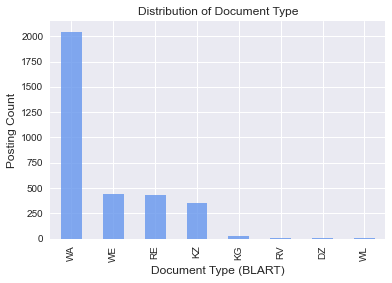

In [47]:
# initialisieren des Diagramms
fig, ax = plt.subplots()

# erstellen des Histograms der Belegartenverteilung
bkpf_data_sel['BLART'].value_counts().plot(ax=ax, kind='bar', color='cornflowerblue', alpha=0.8)

# hinzufügen der Achsenbeschriftungen
plt.ylabel('Posting Count', fontsize=12)
plt.xlabel('Document Type (BLART)', fontsize=12)

# hinzufügen des Titels
plt.title('Distribution of Document Type', fontsize=12);

Lassen Sie uns nun die insgesamt neun Belegköpfe extrahieren, die Buchungen betreffen, welche über selten verwendete der Belegarten gebucht werden. Zum Filtern dieser Belegköpfe kann wieder auf die `isin` Anweisung ([Dokumentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html)) der `Pandas` Bibliothek zurückgegriffen werden:

In [48]:
bkpf_unusual_blart = bkpf_data_sel[bkpf_data_sel['BLART'].isin(['RV' , 'DZ', 'WL'])]

Lassen Sie uns nun die gefilterten Belegköpfe auch innerhalb des Notebooks prüfen:

In [49]:
bkpf_unusual_blart

,KEY,MANDT,BUKRS,BELNR,GJAHR,BLART,USNAM,TCODE,BLDAT,CPUDT,BUDAT,BKTXT,WAERS
0,375_US00_2016_90000000,375,US00,90000000,2016,RV,GBI-005,VF01,5/27/16,5/27/16,5/27/16,NaN,USD
1,375_US00_2016_90000001,375,US00,90000001,2016,RV,GBI-005,VF01,5/27/16,5/27/16,5/27/16,NaN,USD
2,375_US00_2016_90000002,375,US00,90000002,2016,RV,GBI-005,VF01,5/27/16,5/27/16,5/27/16,NaN,USD
3,375_US00_2016_1400000000,375,US00,1400000000,2016,DZ,GBI-005,FBZ1,5/27/16,5/27/16,5/27/16,NaN,USD
4,375_US00_2016_1400000001,375,US00,1400000001,2016,DZ,GBI-005,FBZ1,5/27/16,5/27/16,5/27/16,NaN,USD
5,375_US00_2016_1400000002,375,US00,1400000002,2016,DZ,GBI-005,FBZ1,5/27/16,5/27/16,5/27/16,NaN,USD
2360,375_US00_2016_4900002046,375,US00,4900002046,2016,WL,BOETTCHER,VL02N,5/27/16,5/27/16,5/27/16,NaN,USD
2361,375_US00_2016_4900002047,375,US00,4900002047,2016,WL,HAEUSLER,VL02N,5/27/16,5/27/16,5/27/16,NaN,USD
2362,375_US00_2016_4900002048,375,US00,4900002048,2016,WL,BOETTCHER,VL02N,5/27/16,5/27/16,5/27/16,NaN,USD


Abschliessend möchten wir zudem die gefilterten Belegköpfe in eine **externe Excel-Datei** auf dem lokalen Dateisystem exportieren. Dies kann beispielsweise für nachgelagerte substanzielle Prüfungshandlungen sinnvoll erscheinen. 

Zu Dokumentationszwecken erzeugen wir zunächst wieder einen **Zeitstempel des Datenexports**. Die Erstellung des Zeitstempels erfolgt über die `utcnow` Anweisung ([Dokumentation](https://docs.python.org/3/library/datetime.html)) der `datetime` Bibliothek und Formatangabe des Zeitstempels:

In [50]:
timestamp = dt.datetime.utcnow().strftime('%Y-%m-%d_%H-%M-%S')

Für den tatsächlichen Export der entsprechenden Belegköpfe kann auf die `to_excel` Anweisung ([Dokumentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_excel.html)) der `Pandas` Bibliothek zurückgegriffen werden. Der zweite Speichervorgang erfolgt innerhalb des bereits zuvor erstellten Ordners für **Validierungsergebnisse** mit dem Namen ***03_validation_results***:

In [51]:
# definition des Dateinamens
file_name = str(timestamp) + '-VA_002_unusal_document_types.xlsx'

# definition des Dateipfades
file_directory = os.path.join(validation_data_dir, file_name)

# extraktion der Daten nach Excel
bkpf_unusual_blart.to_excel(file_directory, header=True, index=False, sheet_name='Unusual_BLART', encoding='utf-8')

### 5.3. Semantische Validierung numerischer Datenmerkmale

In einem zweiten Schritt validieren wir die semantische Integrität der erhaltenen **numerischen Datenfelder**. Hierzu werden verschiedene Verteilungsstatistiken berechnet. Die nachfolgende Validierung erfolgt beispielhaft anhand der Tabelle **Belegsegmente (BSEG)** und der Datenmerkmale Betrag in Hauswährung (Tabellenfeld: DMBTR) und Betrag in Fremdwährung (Tabellenfeld: WRBTR) unter Verwendung der `describe` Anweisung ([Dokumentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)) der `Pandas` Bibliothek:

In [52]:
bseg_data_sel[['DMBTR', 'WRBTR']].describe()

,DMBTR,WRBTR
count,2811.00,2811.00
mean,16860571.56,40321851.39
std,281300150.22,740458715.37
min,0.14,0.00
25%,2476.03,2640.59
50%,20000.00,24705.80
75%,100000.00,120000.00
max,6039000000.00,25974025974.00


Auf Grundlage der Validierung wird deutlich, dass einzelne Belegsegmente ungewöhnlich hohe Buchungsbeträge in Hauswährung als auch in Fremdwährung aufweisen. Die Beträge weichen in beiden Fällen signifikant um mehrere Standardabweichungen vom Mittelwert der jeweilig erfassten Buchungsbeträge ab. Die gewonnenen Informationen gilt es im Anschluss mit einer entsprechenden Erwartungshaltung abzugleichen bzw. zu plausibilisieren.

Für eine aussagekräftige Dokumentation kann es wieder sinnvoll sein, die Verteilung der Beträge z.B. anhand eines **Boxplots** zu visualisieren. Zur Erstellung eines solchen Diagramms kann wieder auf die Funktionalität der `Matplotlib` Bibliothek zurückgegriffen werden:

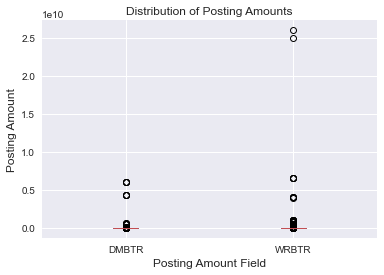

In [53]:
# initialisieren des Diagramms
fig, ax = plt.subplots()

# erstellen des Boxplots der Betragsverteilungen
bseg_data_sel.boxplot(column=['DMBTR', 'WRBTR'])

# hinzufügen der Achsenbeschriftungen
plt.ylabel('Posting Amount', fontsize=12)
plt.xlabel('Posting Amount Field', fontsize=12)

# hinzufügen des Titels
plt.title('Distribution of Posting Amounts', fontsize=12);

Lassen Sie uns nun die Belegsegmente extrahieren, welche einen ungewöhnlich hohen Buchungsbetrag aufweisen. Hierzu berechnen wir zunächst den **Mittelwert** und die **Standardabweichung** des Betrags in Hauswährung (Tabellenfeld: DMBTR). Zur Berechnung dieser Statistiken kann auf die Anweisungen `mean` ([Dokumentation](https://numpy.org/doc/stable/reference/generated/numpy.mean.html)) und `std` ([Dokumentation](https://numpy.org/doc/stable/reference/generated/numpy.std.html)) der `NumPy` Bibliothek zurückgegriffen werden:

In [54]:
# berechnung des Mittelwertes
dmbtr_mean = np.mean(bseg_data_sel['DMBTR'])

# berechnung der Standardabweichung
dmbtr_std = np.std(bseg_data_sel['DMBTR'])

In einem nächsten Schritt möchten wir nun Belegsegmente, deren Betrag in Hauswährung (Tabellenfeld: DMBTR) grösser oder gleich $n=3$ positive Standardabweichungen vom Mittelwert abweichen. Zum Filtern dieser Belegköpfe kann auf die gewöhnliche Filterfunktionalität der `Pandas` Bibliothek zurückgegriffen werden:

In [55]:
# setzen der Anzahl positiver Standardabweichungen
n = 3

# filtern von Belegsegmenten ungewöhnlicher hoher Buchungsbeträge
bseg_unusual_amount = bseg_data_sel[bseg_data_sel['DMBTR'] >= (n * dmbtr_std) + dmbtr_mean]

Lassen Sie uns nun die gefilterten Belegsegmente auch innerhalb des Notebooks prüfen:

In [56]:
bseg_unusual_amount

,KEY,MANDT,BUKRS,BELNR,GJAHR,BUZEI,BSCHL,DMBTR,WRBTR,SHKZG,HKONT,SGTXT,KUNNR,LIFNR,DMBTR_VZ,WRBTR_VZ
1198,375_US00_2017_5000000195,375,US00,5000000195,2017,2,96,6039000000.00,4026000000.00,H,310000,NaN,NaN,125114.00,-6039000000.00,-4026000000.00
1199,375_US00_2017_5000000195,375,US00,5000000195,2017,3,86,5989000000.00,3992666667.00,S,760000,NaN,NaN,125114.00,5989000000.00,3992666667.00
1201,375_US00_2017_5000000196,375,US00,5000000196,2017,2,96,4378843582.89,6550750000.00,H,310000,NaN,NaN,125113.00,-4378843582.89,-6550750000.00
1202,375_US00_2017_5000000196,375,US00,5000000196,2017,3,86,4358843582.89,6520830000.00,S,760000,NaN,NaN,125113.00,4358843582.89,6520830000.00
2356,375_US00_2017_5105600413,375,US00,5105600413,2017,2,86,6039000000.00,4026000000.00,S,310000,NaN,NaN,NaN,6039000000.00,4026000000.00
2357,375_US00_2017_5105600413,375,US00,5105600413,2017,3,96,5964000000.00,3976000000.00,H,760000,NaN,NaN,NaN,-5964000000.00,-3976000000.00
2359,375_US00_2017_5105600414,375,US00,5105600414,2017,2,86,4378843582.89,6550750000.00,S,310000,NaN,NaN,NaN,4378843582.89,6550750000.00
2360,375_US00_2017_5105600414,375,US00,5105600414,2017,3,96,4365474598.93,6530750000.00,H,760000,NaN,NaN,NaN,-4365474598.93,-6530750000.00


Wir möchten nun die gefilterten Belegsegmente wieder in eine **externe Excel-Datei** auf dem lokalen Dateisystem exportieren. Dies kann beispielsweise für nachgelagerte substanzielle Prüfungshandlungen oder sinnvoll erscheinen. 

Zu Dokumentationszwecken erzeugen wir zunächst wieder einen **Zeitstempel des Datenexports**. Die Erstellung des Zeitstempels erfolgt über die `utcnow` Anweisung ([Dokumentation](https://docs.python.org/3/library/datetime.html)) der `datetime` Bibliothek und Formatangabe des Zeitstempels:

In [57]:
timestamp = dt.datetime.utcnow().strftime('%Y-%m-%d_%H-%M-%S')

Für den tatsächlichen Export der entsprechenden Belegsegmente kann auf die `to_excel` Anweisung ([Dokumentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_excel.html)) der `Pandas` Bibliothek zurückgegriffen werden:

In [58]:
# definition des Dateinamens
file_name = str(timestamp) + '-VA_003_unusal_posting_amounts.xlsx'

# definition des Dateipfades
file_directory = os.path.join(validation_data_dir, file_name)

# extraktion der Daten nach Excel
bseg_unusual_amount.to_excel(file_directory, header=True, index=False, sheet_name='Unusual_DMBTR', encoding='utf-8')

### 5.4. Semantische Validierung kombinierter Datenmerkmale

In einem dritten Schritt validieren wir die semantische Datenintegrität der Kombination unterschiedlicher Datenmerkmale. Hierzu berechnen wir auch wieder verschiedene Verteilungsstatistiken. Die nachfolgende Validierung erfolgt beispielhaft anhand der Tabelle **Belegsegmente (BSEG)** und der Datenmerkmale Hauptbuchkonto (Tabellenfeld: HKONT) und Buchungschlüssel (Tabellenfeld: BSCHL) unter Verwendung der `pivot_table` Anweisung ([Dokumentation](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html)) der `Pandas` Bibliothek:

In [59]:
pd.pivot_table(bseg_data_sel, values='KEY', index=['HKONT'], columns=['BSCHL'], aggfunc=np.size, fill_value=0)

BSCHL,21,25,31,35,40,50,81,83,86,89,91,93,96,99
HKONT,,,,,,,,,,,,,,
100000,0,0,0,0,30,350,0,0,0,0,0,0,0,0
200000,0,0,0,0,0,0,0,0,0,355,0,0,0,14
210000,0,0,0,0,0,1,1,0,0,0,0,0,0,0
300000,47,353,320,30,0,0,0,0,0,0,0,0,0,0
310000,0,0,0,0,0,0,0,0,426,0,0,0,464,0
720000,0,0,0,0,0,0,0,0,0,0,28,0,0,0
740000,0,0,0,0,0,1,0,0,0,0,0,0,0,0
741000,0,0,0,0,0,0,1,0,0,0,0,0,0,0
760000,0,0,0,0,2,34,0,32,134,0,0,72,71,0


Die Validierung zeigt diverse seltene bzw. 'ungewöhnliche' Kombinationen Haupttbuchkonto-Buchungsschlüssel-Kombinationen. Beispielsweise wurde das **Hauptbuchkonto 741000** lediglich ein einziges mal über den **Buchungschlüssel 50** bebucht. Auch hier gilt es die gewonnenen Informationen im Anschluss zu plausibilisieren.

Für eine aussagekräftige Dokumentation kann es wieder sinnvoll sein, die Verteilung der Kombination aus Hauptbuchkonto (Tabellenfeld: HKONT) und Buchungsschlüssel (Tabellenfeld: BSCHL) z.B. anhand einer **Heatmap** zu visualisieren. Zur Erstellung eines solchen Diagramms kann auf die Funktionalität der `Matplotlib` Bibliothek in Kombination mit der `Seaborn` Bibliothek zurückgegriffen werden:

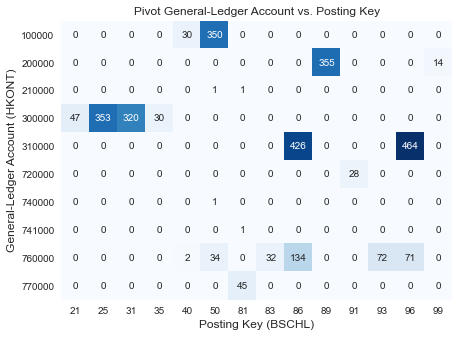

In [60]:
# initialisieren des Diagramms
fig, ax = plt.subplots(figsize=(7,7))

# erstellen der Pivot Tabelle aus Hauptbuchkonto und Buchungsschlüssel
pivot = pd.pivot_table(bseg_data_sel, values='KEY', index=['HKONT'], columns=['BSCHL'], aggfunc=np.size, fill_value=0)

# visualisierung der Pivot Tabelle als Seaborn Heatmap
sns.heatmap(pivot, square=True, annot=True, cbar=False, cmap='Blues', fmt='g')

# hinzufügen der Achsenbeschriftungen
plt.ylabel('General-Ledger Account (HKONT)', fontsize=12)
plt.xlabel('Posting Key (BSCHL)', fontsize=12)

# hinzufügen des Titels
plt.title('Pivot General-Ledger Account vs. Posting Key', fontsize=12);

Lassen Sie uns nun die insgesamt 6 Belegsegmente extrahieren, die Buchungen betreffen, welche über eine **selten verwendete Kombination** von Hauptbuchkonto (Tabellenfeld: HKONT) und Buchungsschlüssel (Tabellenfeld: BSCHL) aufweisen. Zum Filtern dieser Belegköpfe kann auf die multiple Filterfunktionalität der `Pandas` Bibliothek zurückgegriffen werden:

In [61]:
# filtern ungewöhnlicher Hauptbuchkonto und Buchungsschlüssel Kombinationen
bseg_unsual_account_key_1 = bseg_data_sel[(bseg_data_sel['HKONT'] == 760000) & (bseg_data_sel['BSCHL'] == 40)]
bseg_unsual_account_key_2 = bseg_data_sel[(bseg_data_sel['HKONT'] == 741000) & (bseg_data_sel['BSCHL'] == 81)] 
bseg_unsual_account_key_3 = bseg_data_sel[(bseg_data_sel['HKONT'] == 740000) & (bseg_data_sel['BSCHL'] == 50)] 
bseg_unsual_account_key_4 = bseg_data_sel[(bseg_data_sel['HKONT'] == 210000) & (bseg_data_sel['BSCHL'] == 50)]
bseg_unsual_account_key_5 = bseg_data_sel[(bseg_data_sel['HKONT'] == 210000) & (bseg_data_sel['BSCHL'] == 81)] 

# zusammenführen der Teilergebnisse
bseg_unsual_account_key = pd.concat([bseg_unsual_account_key_1, bseg_unsual_account_key_2, bseg_unsual_account_key_3, bseg_unsual_account_key_4, bseg_unsual_account_key_5], axis=0)

Lassen Sie uns nun die gefilterten Belegsegmente auch innerhalb des Notebooks prüfen:

In [62]:
bseg_unsual_account_key

,KEY,MANDT,BUKRS,BELNR,GJAHR,BUZEI,BSCHL,DMBTR,WRBTR,SHKZG,HKONT,SGTXT,KUNNR,LIFNR,DMBTR_VZ,WRBTR_VZ
58,375_US00_2017_1500000029,375,US00,1500000029,2017,3,40,0.14,0.14,S,760000,NaN,NaN,NaN,0.14,0.14
247,375_US00_2017_1500000122,375,US00,1500000122,2017,3,40,5.00,5.00,S,760000,NaN,NaN,NaN,5.00,5.00
2056,375_US00_2017_5105600283,375,US00,5105600283,2017,2,81,90000.00,90000.00,S,741000,NaN,NaN,NaN,90000.00,90000.00
667,375_US00_2017_5000000005,375,US00,5000000005,2017,4,50,466576.70,1642350.00,H,740000,NaN,NaN,125001.00,-466576.70,-1642350.00
65,375_US00_2017_1500000033,375,US00,1500000033,2017,1,50,120000.00,120000.00,H,210000,NaN,NaN,NaN,-120000.00,-120000.00
1533,375_US00_2017_5000000353,375,US00,5000000353,2017,1,81,80000.00,80000.00,S,210000,Server Maintenance,NaN,125129.00,80000.00,80000.00


Wir möchten nun die gefilterten Belegsegmente wieder in eine **externe Excel-Datei** auf dem lokalen Dateisystem exportieren. Dies kann beispielsweise für nachgelagerte substanzielle Prüfungshandlungen oder sinnvoll erscheinen. 

Zu Dokumentationszwecken erzeugen wir zunächst wieder einen **Zeitstempel des Datenexports** über die `utcnow` Anweisung ([Dokumentation](https://docs.python.org/3/library/datetime.html)) der `datetime` Bibliothek und Formatangabe des Zeitstempels:

In [63]:
timestamp = dt.datetime.utcnow().strftime('%Y-%m-%d_%H-%M-%S')

Für den tatsächlichen Export der entsprechenden Belegsegmente kann wieder auf die `to_excel` Anweisung ([Dokumentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_excel.html)) der `Pandas` Bibliothek zurückgegriffen werden:

In [64]:
# definition des Dateinamens
file_name = str(timestamp) + '-VA_004_unusal_accounts_and_posting_keys.xlsx'

# definition des Dateipfades
file_directory = os.path.join(validation_data_dir, file_name)

# extraktion der Daten nach Excel
bseg_unsual_account_key.to_excel(file_directory, header=True, index=False, sheet_name='Unusual_HKONT_BSCHL', encoding="utf-8")

## Lab Aufgaben:

Im Ihr wissen zu vertiefen empfehlen wir, die nachfolgenden Übungen zu bearbeiten:

**1. Validierung der verwendeten Benutzerkennungen.**

> Validieren Sie die innerhalb der Belegköpfe **verwendeten Benutzerkennungen** (Tabelle: BKPF, Tabellenfeld: USNAM). Erstellen Sie hierzu eine Übersicht der im Datensatz enthaltenen Benutzerkennungen. Ermitteln Sie für jede Benutzerkennung die Anzahl erfasster Belegköpfe unter Verwendung der `value_counts` Anweisung der `Pandas` Bibliothek.  Extrahieren Sie abschliessend die Belegköpfe der Benutzerkennungen, die **weniger als 10 Belegköpfe erfassten** in eine gesonderte Excel-Datei.

In [65]:
# ***************************************************
# Sie können Ihre Lösung an dieser Stelle einfügen
# ***************************************************

**2. Validierung der Kombination verwendeter Lieferanten und Buchungstexte.**

> Validieren Sie die Kombination der innerhalb der Belegsegmente **verwendeten Lieferanten** (Tabelle: BSEG, Tabellenfeld: LIFNR) in Kombination mit den **erfassten Buchungstexten** (Tabelle: BSEG, Tabellenfeld: SGTXT). Erstellen Sie hierzu eine Pivot Übersicht der im Datensatz enthaltenen Kombinationen aus Lieferanten und Buchungstexten. Ermitteln Sie für jede Kombination die **Anzahl erfasster Belegsegmente** unter Verwendung der `pivot_table` Anweisung der `Pandas` Bibliothek. Extrahieren Sie abschliessend die Belegsegmente die **den Buchungstext 'Consulting' aufweisen** in eine gesonderte Excel-Datei.

In [66]:
# ***************************************************
# Sie können Ihre Lösung an dieser Stelle einfügen
# ***************************************************

**3. Validierung der Kombination verwendeter Lieferanten und Benutzerkennungen.**

> Validieren Sie die Kombination der innerhalb der Belegsegmente **verwendeten Lieferanten** (Tabelle: BSEG, Tabellenfeld: LIFNR) und **Benutzerkennungen** (Tabelle: BKPF, Tabellenfeld: USNAM). Erstellen Sie hierzu eine Pivot Übersicht der im Datensatz enthaltenen Kombinationen aus Lieferanten und Benutzerkennungen. Ermitteln Sie für jede Kombination **die Anzahl, das Betragsvolumen und das durchschnittliche Betragsvolumen erfasster Belegsegmente** (Tabelle: BSEG, Tabellenfeld: DMBTR) unter Verwendung der `group_by` Anweisung der `Pandas` Bibliothek. Extrahieren Sie abschliessend die Belegsegmente, welche die **Benutzerkennung 'GBI-010'** und den **Lieferant '125114'** aufweisen in eine gesonderte Excel-Datei.

In [67]:
# ***************************************************
# Sie können Ihre Lösung an dieser Stelle einfügen
# ***************************************************

## Lab Zusammenfassung:

Dieses zweite Notebook umfasst eine schrittweise Einführung in die grundlegenden Konzepte der Datenvalidierung im Kontext forensischer Datenanalysen. Dabei wurden insbesondere die Teilschritte **(1) Datenimport**,  **(2) Datenaufbereitung** und **(3) Datenvalidierung** behandelt. Die vorgestellten Code Beispiele und die Übungen können als Ausgangspunkt für komplexere und Ihre massgeschneiderten Analysen dienen.